In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\raven\Downloads\sf-crime\train.csv\train.csv")
test  = pd.read_csv(r"C:\Users\raven\Downloads\sf-crime\test.csv\test.csv")

In [3]:
# train.head(10)

In [4]:
# sns.scatterplot(x = 'X', y = 'Y', data = test)

In [5]:
# sns.scatterplot(x = 'X',y = 'Y', data = train)

In [6]:
# train.describe()

In [7]:
# train.Category.unique()

In [8]:
# test.head()

In [9]:
# train['Resolution'].unique()

In [10]:
# test.head()

In [11]:
# fig, ax = plt.subplots(figsize = (10, 8))
# pd = sns.countplot(y = train['PdDistrict'])
# pd.set_title('PdDistrict Counts')

In [12]:
# fig, ax  = plt.subplots(figsize = (10, 8))
# cri_counts = sns.countplot(y = train['Category'])
# cri_counts.set_title('Crime Counts')

In [13]:
# week = train['DayOfWeek'].value_counts()
# week.plot(kind="bar",figsize=(8,6), table=True,  color='lightslategrey')

# plt.xticks([])
# plt.xlabel('DayOfWeek',fontsize=15,labelpad=25)
# plt.ylabel('Count',fontsize=15)
# plt.title('曜日別犯罪数',fontsize=25)
# plt.show()

# week.describe()

In [14]:
# Dt = pd.to_datetime(train['Dates'])
# train['Year'] = Dt.dt.year
# train['Month'] = Dt.dt.month
# train['Day'] = Dt.dt.day
# train['Hour'] = Dt.dt.hour
# train.drop(["Dates"], axis = 1, inplace = True)

In [15]:
# data = train.groupby(['Hour', 'Date', 'Category'],
#                      as_index=False).count().iloc[:, :4]
# data.rename(columns={'Dates': 'Inсidents'}, inplace=True)
# data = data.groupby(['Hour', 'Category'], as_index=False).mean()

# sns.set_style("whitegrid")
# fig, ax = plt.subplots(figsize=(14, 10))
# ax = sns.lineplot(x='Hour', y='Inсidents', data=data, hue='Category')
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=6)
# plt.suptitle('時間帯別犯罪')
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

In [17]:
train['PdDistrict'].value_counts()
type(train['PdDistrict'].value_counts())
df_crime = train['PdDistrict'].value_counts().reset_index()
df_crime.columns = ['Neighbourhood', 'Count']
df_crime

Neighbourhood   Count
0      SOUTHERN  157182
1       MISSION  119908
2      NORTHERN  105296
3       BAYVIEW   89431
4       CENTRAL   85460
5    TENDERLOIN   81809
6     INGLESIDE   78845
7       TARAVAL   65596
8          PARK   49313
9      RICHMOND   45209

In [18]:
import folium
print('Folium installed and imported')
gjson = r'https://cocl.us/sanfran_geojson'
latitude = 37.77
longitude = -122.42
Sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
Sanfran_map.choropleth(
    geo_data=gjson,
    data=df_crime,
    columns=['Neighbourhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate In San Francisco')
Sanfran_map

Folium installed and imported


c:\Users\raven\anaconda3\anaconda\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


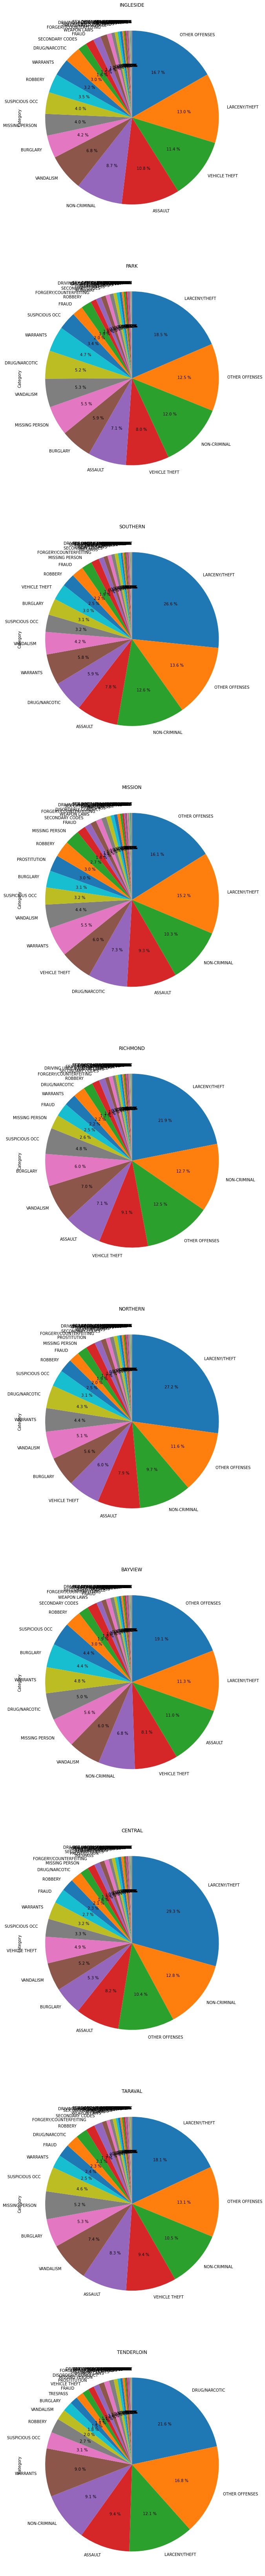

In [93]:
pd_list=list(set(train['PdDistrict']))
plt.figure(figsize=(100,120))
for i ,col in enumerate(pd_list):
    pd1=train.loc[train['PdDistrict']==col,:]
    plt.subplot(10,1, 1+i)
    pd1['Category'].value_counts().plot.pie(autopct='%.1f %%', startangle=90, counterclock=False) 
    plt.title('{}'.format(col))
sorted_sizes, sorted_labels = zip(*sorted(zip(pd_list, pd_list), reverse=True))

In [46]:
print("Most common resolutions for each category in percentage\n")
for i in train.groupby(["Category"])["Resolution"]:
  print('\033[95m'+i[0]+'\033[0m')
  print(round(i[1].value_counts()[:3]/i[1].count()*100,1))
  print()

Most common resolutions for each category in percentage

ARSON
NONE               82.5
ARREST, BOOKED     13.4
JUVENILE BOOKED     1.1
Name: Resolution, dtype: float64
39
ASSAULT
NONE              58.2
ARREST, BOOKED    30.5
ARREST, CITED      4.6
Name: Resolution, dtype: float64
39
BAD CHECKS
NONE                            79.1
ARREST, BOOKED                   6.2
PROSECUTED BY OUTSIDE AGENCY     6.2
Name: Resolution, dtype: float64
39
BRIBERY
ARREST, BOOKED     55.0
NONE               37.4
JUVENILE BOOKED     2.1
Name: Resolution, dtype: float64
39
BURGLARY
NONE              83.9
ARREST, BOOKED    13.2
UNFOUNDED          0.7
Name: Resolution, dtype: float64
39
DISORDERLY CONDUCT
ARREST, BOOKED    34.9
NONE              31.6
ARREST, CITED     30.9
Name: Resolution, dtype: float64
39
DRIVING UNDER THE INFLUENCE
ARREST, BOOKED    85.5
ARREST, CITED      8.2
NONE               5.7
Name: Resolution, dtype: float64
39
DRUG/NARCOTIC
ARREST, BOOKED    81.1
NONE               8.6
ARREST, CIT

In [48]:
def rebuild_datetime(df):
    df['Dates'] = pd.to_datetime(df['Dates'])
    df['Date'] = df['Dates'].dt.date
    df['Hour'] = df['Dates'].dt.hour
    df['Minute'] = df['Dates'].dt.minute
    df['DayOfWeek'] = df['Dates'].dt.weekday
    df['Month'] = df['Dates'].dt.month
    df['Year'] = df['Dates'].dt.year
    df['Block'] = df['Address'].str.contains('block', case=False)
    
    return df

train = rebuild_datetime(train)
test = rebuild_datetime(test)

# check wrong datetime exists.
print("wrong Dates(train):", len(train[train['Dates'].isnull()]))
print("wrong Dates(test):", len(test[test['Dates'].isnull()]))

wrong Dates(train): 0
wrong Dates(test): 0


C:\Users\raven\AppData\Local\Temp\ipykernel_26084\357574379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\357574379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


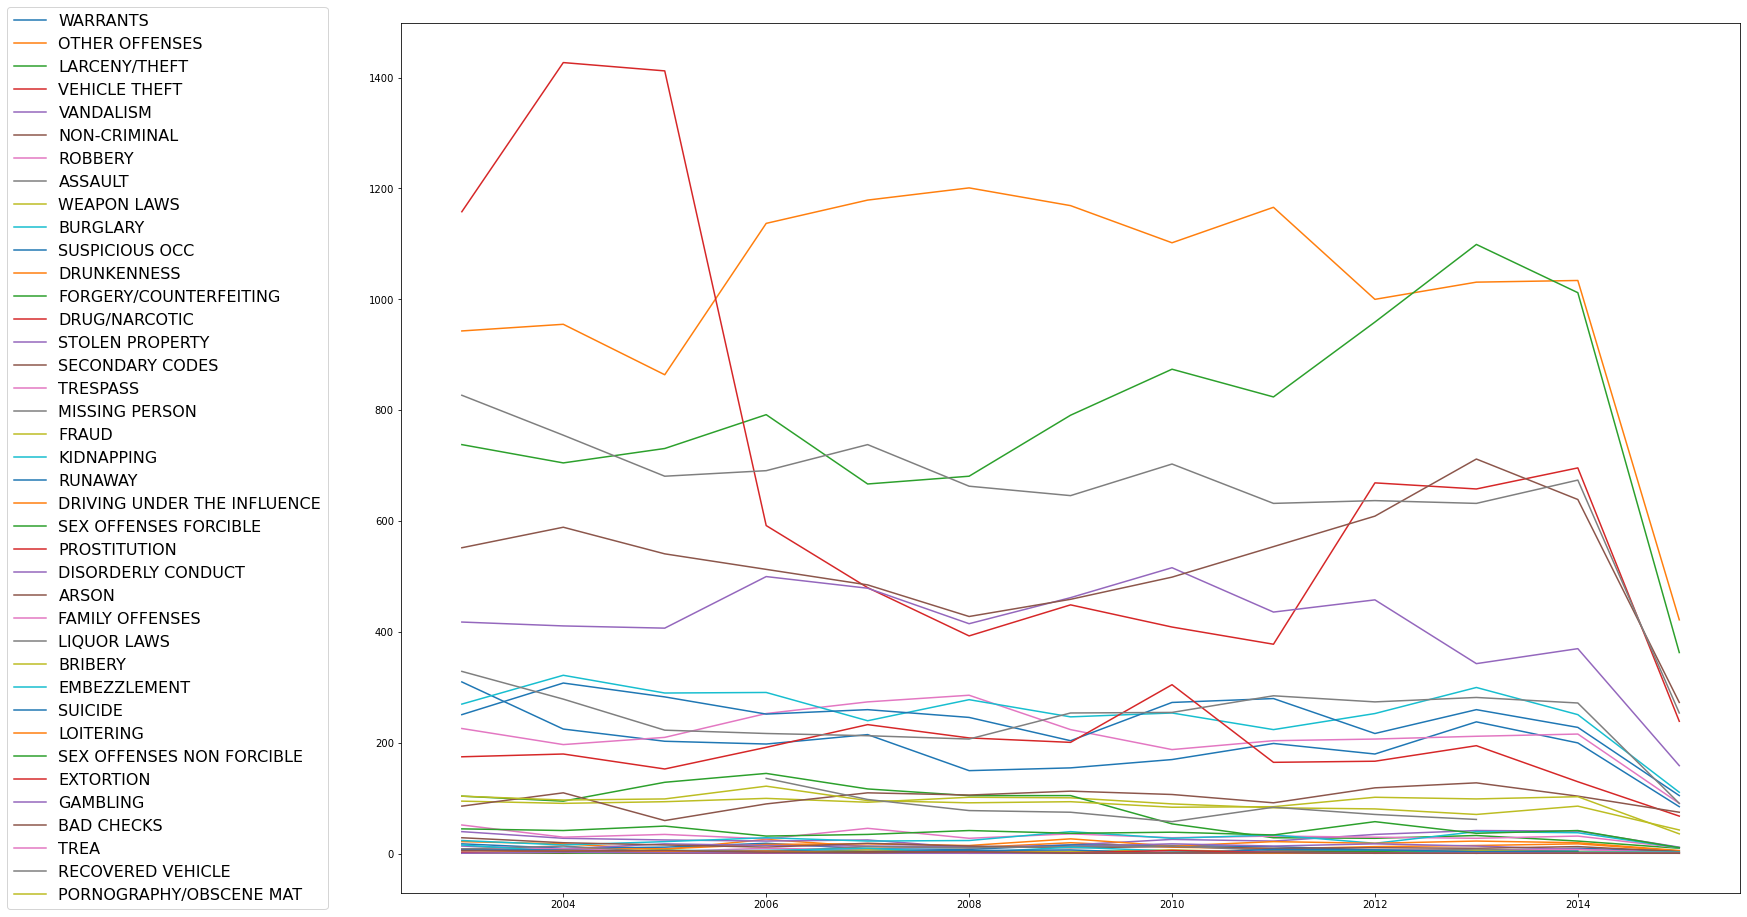

In [81]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('INGLESIDE')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 16}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\424282333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\424282333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


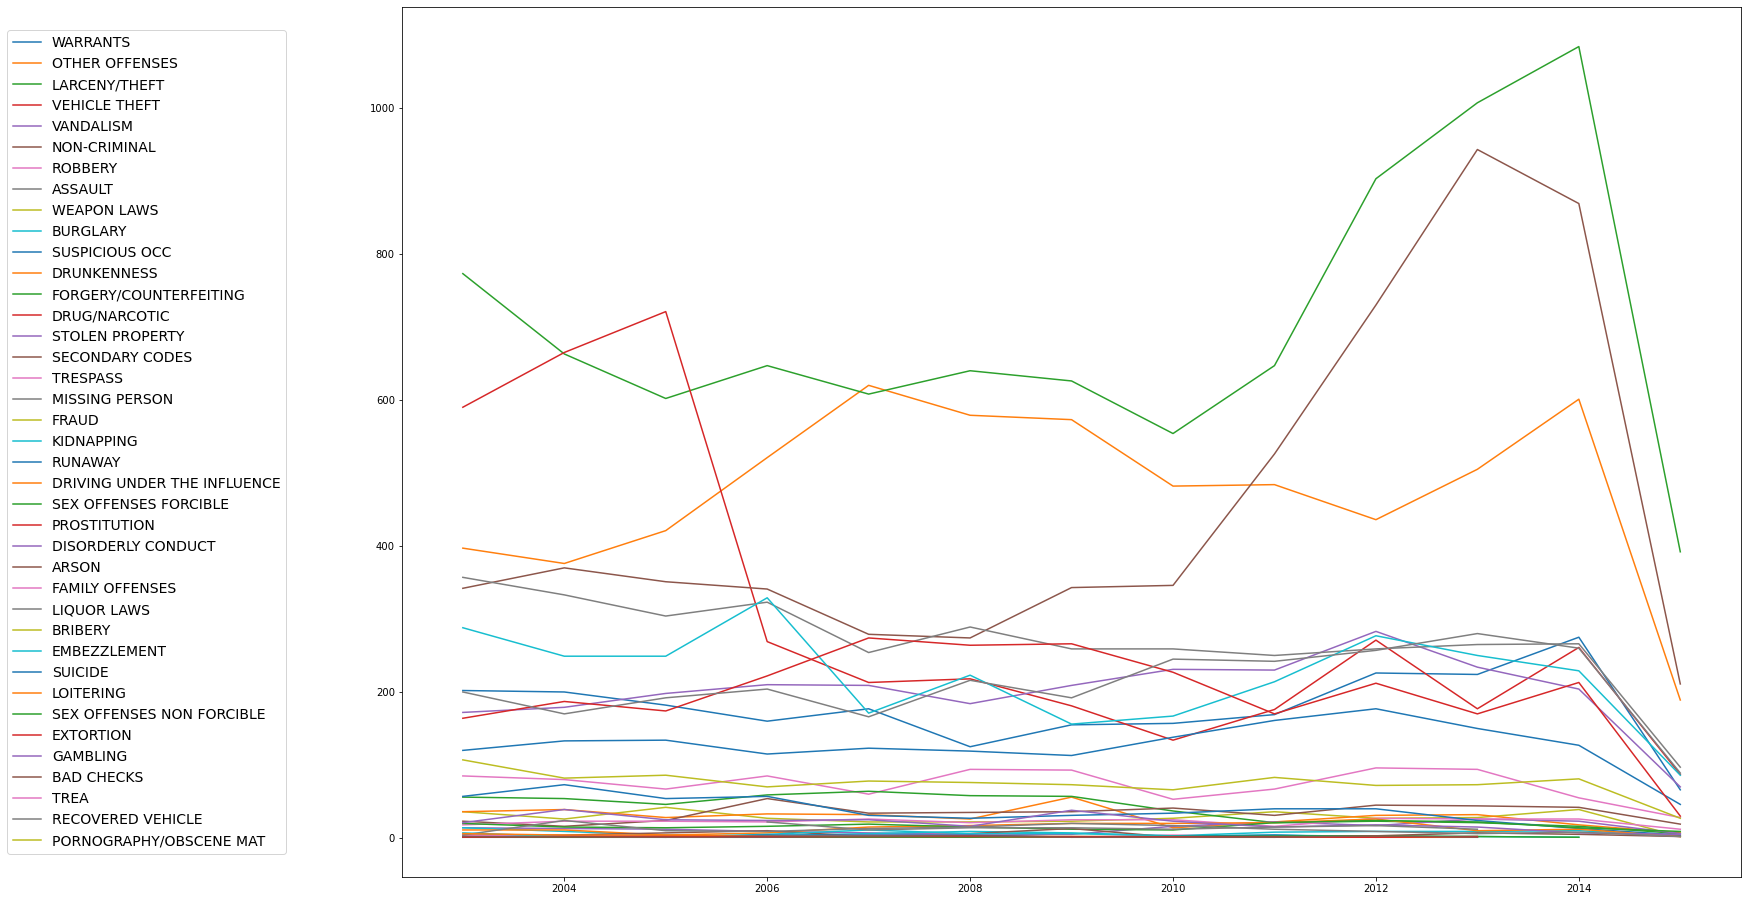

In [82]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('PARK')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\2091842568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\2091842568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


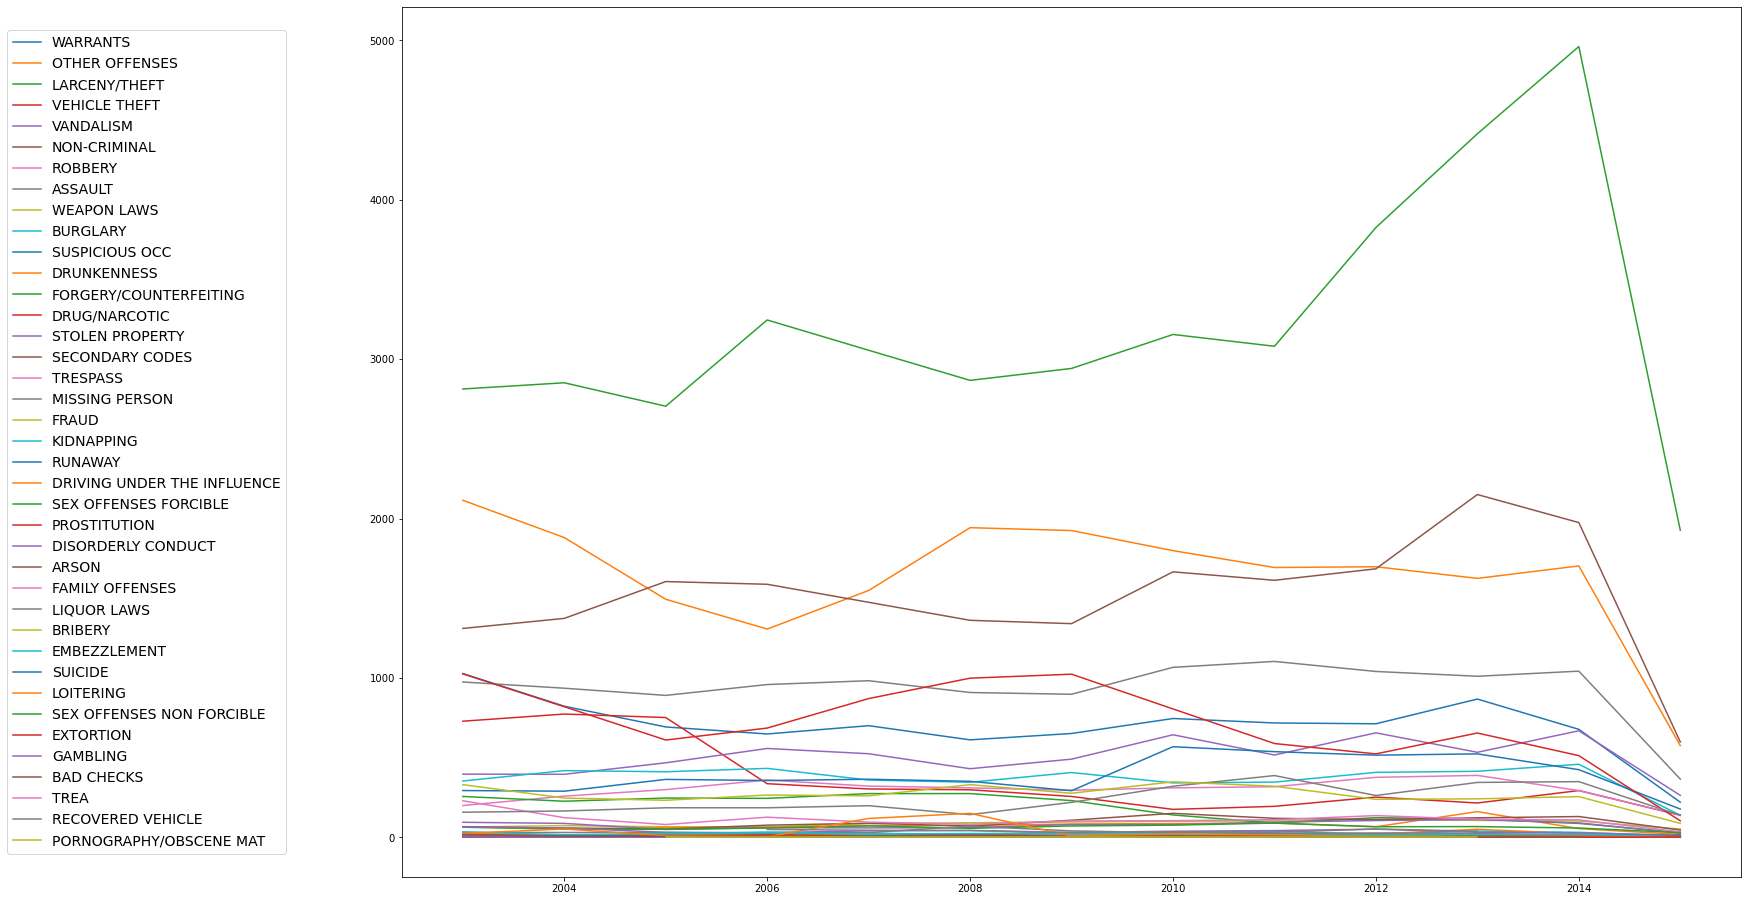

In [83]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('SOUTHERN')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\1595349841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\1595349841.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


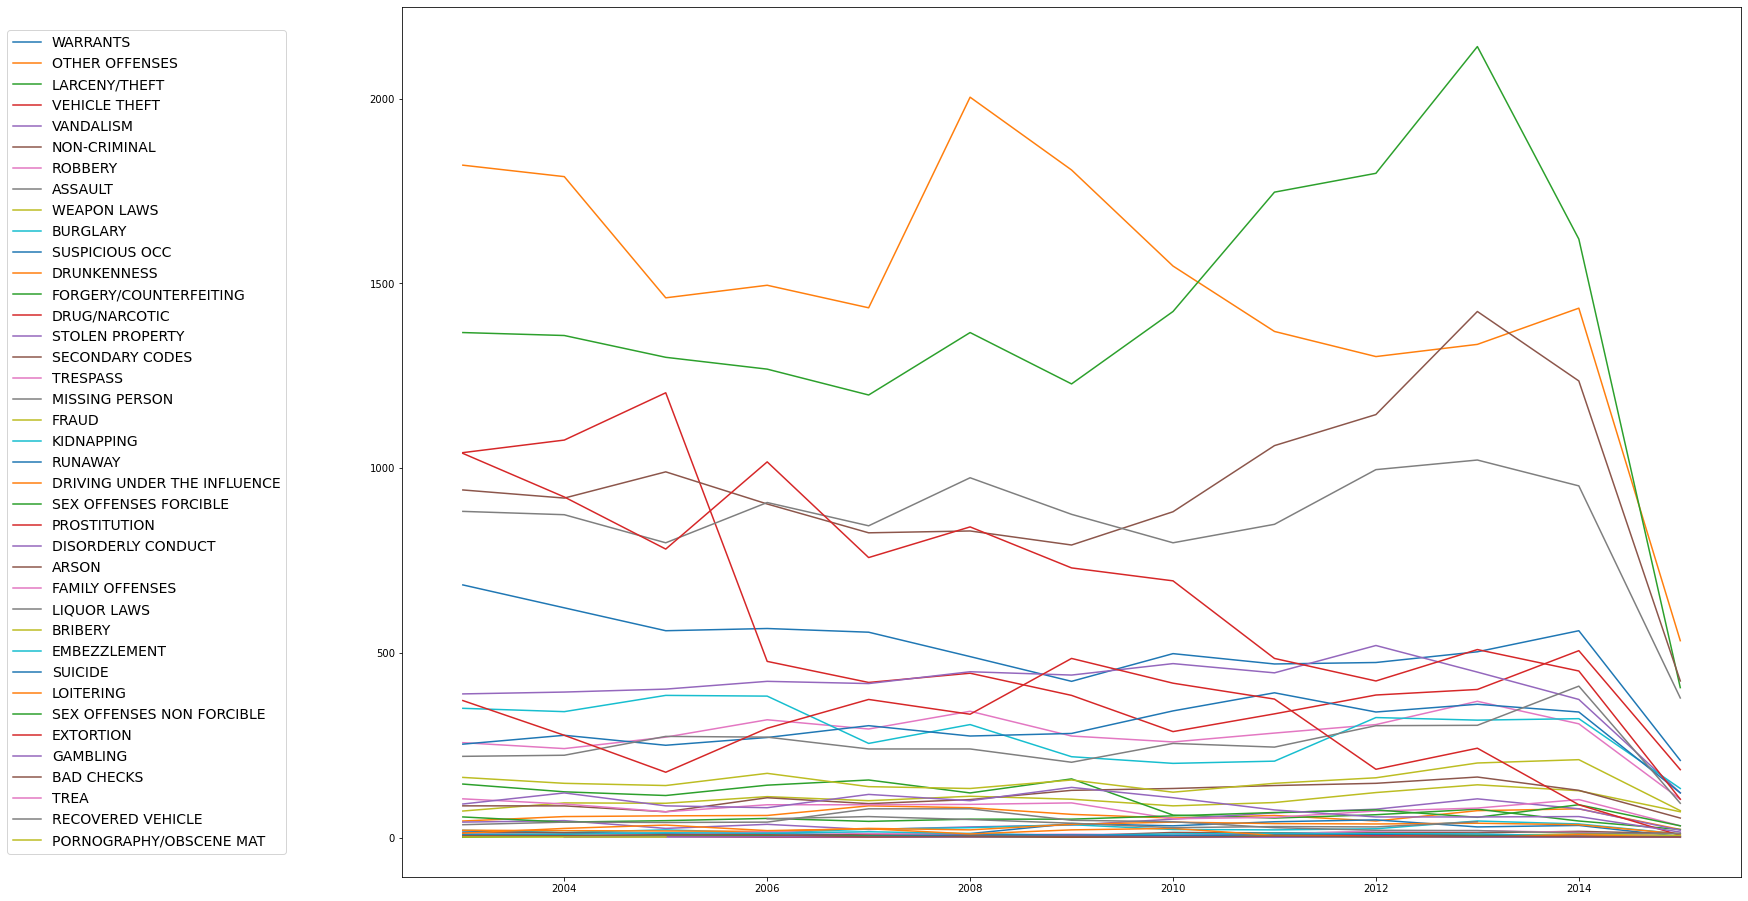

In [85]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('MISSION')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\2807211576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\2807211576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


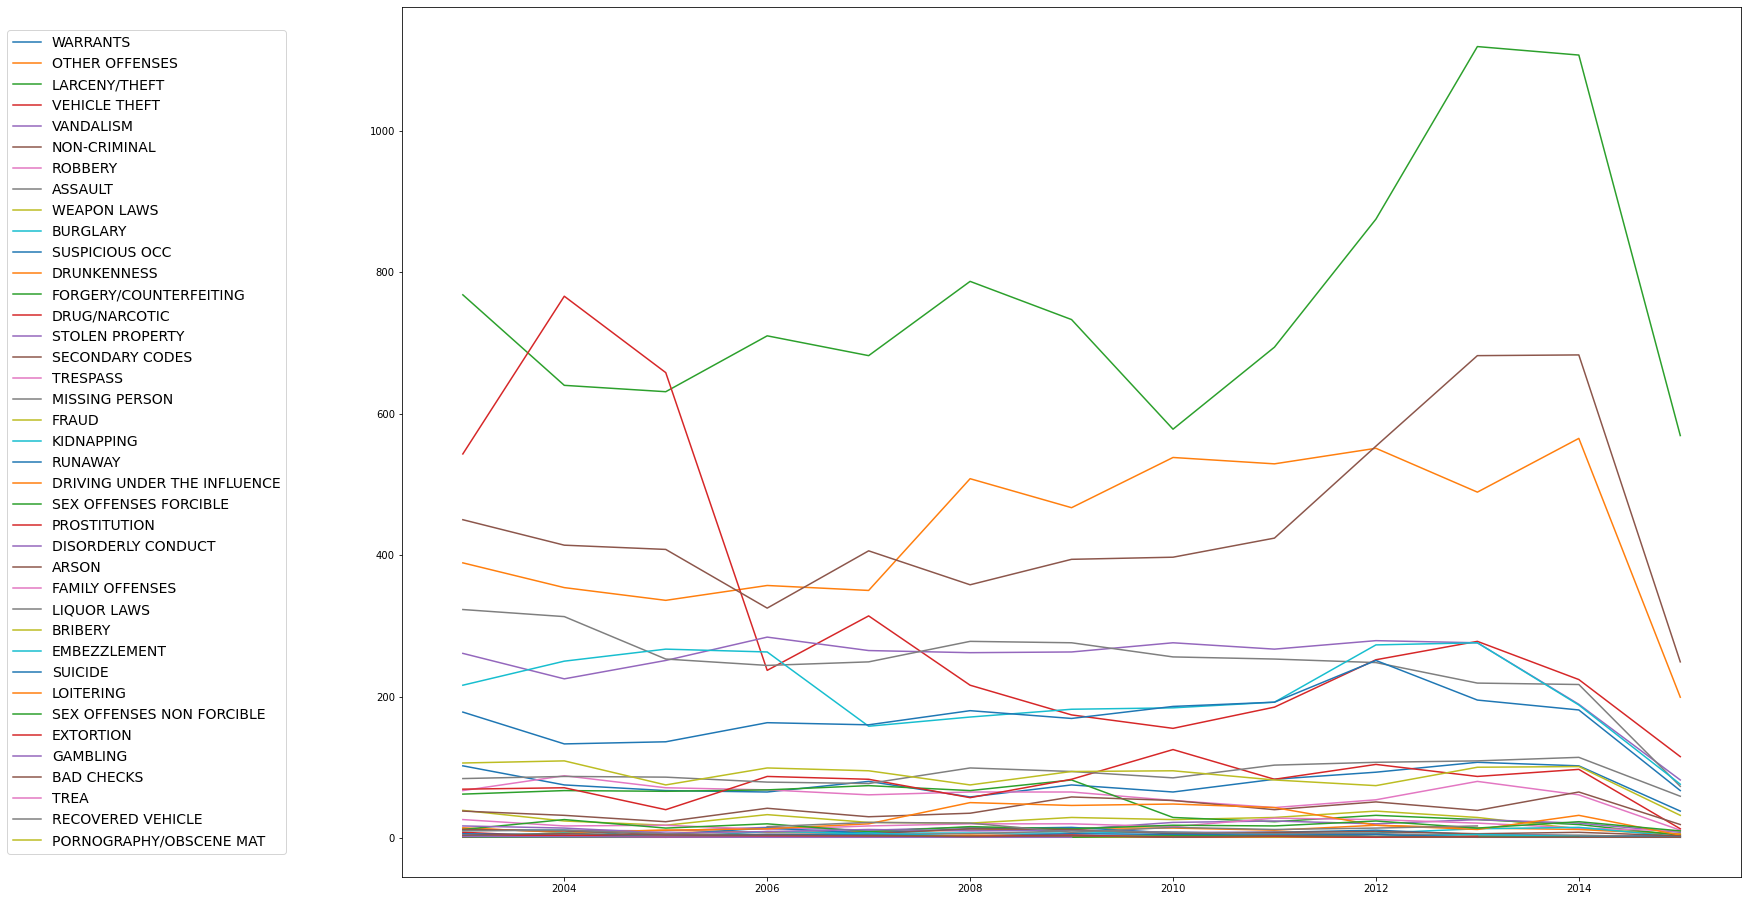

In [86]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('RICHMOND')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\2139698475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\2139698475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


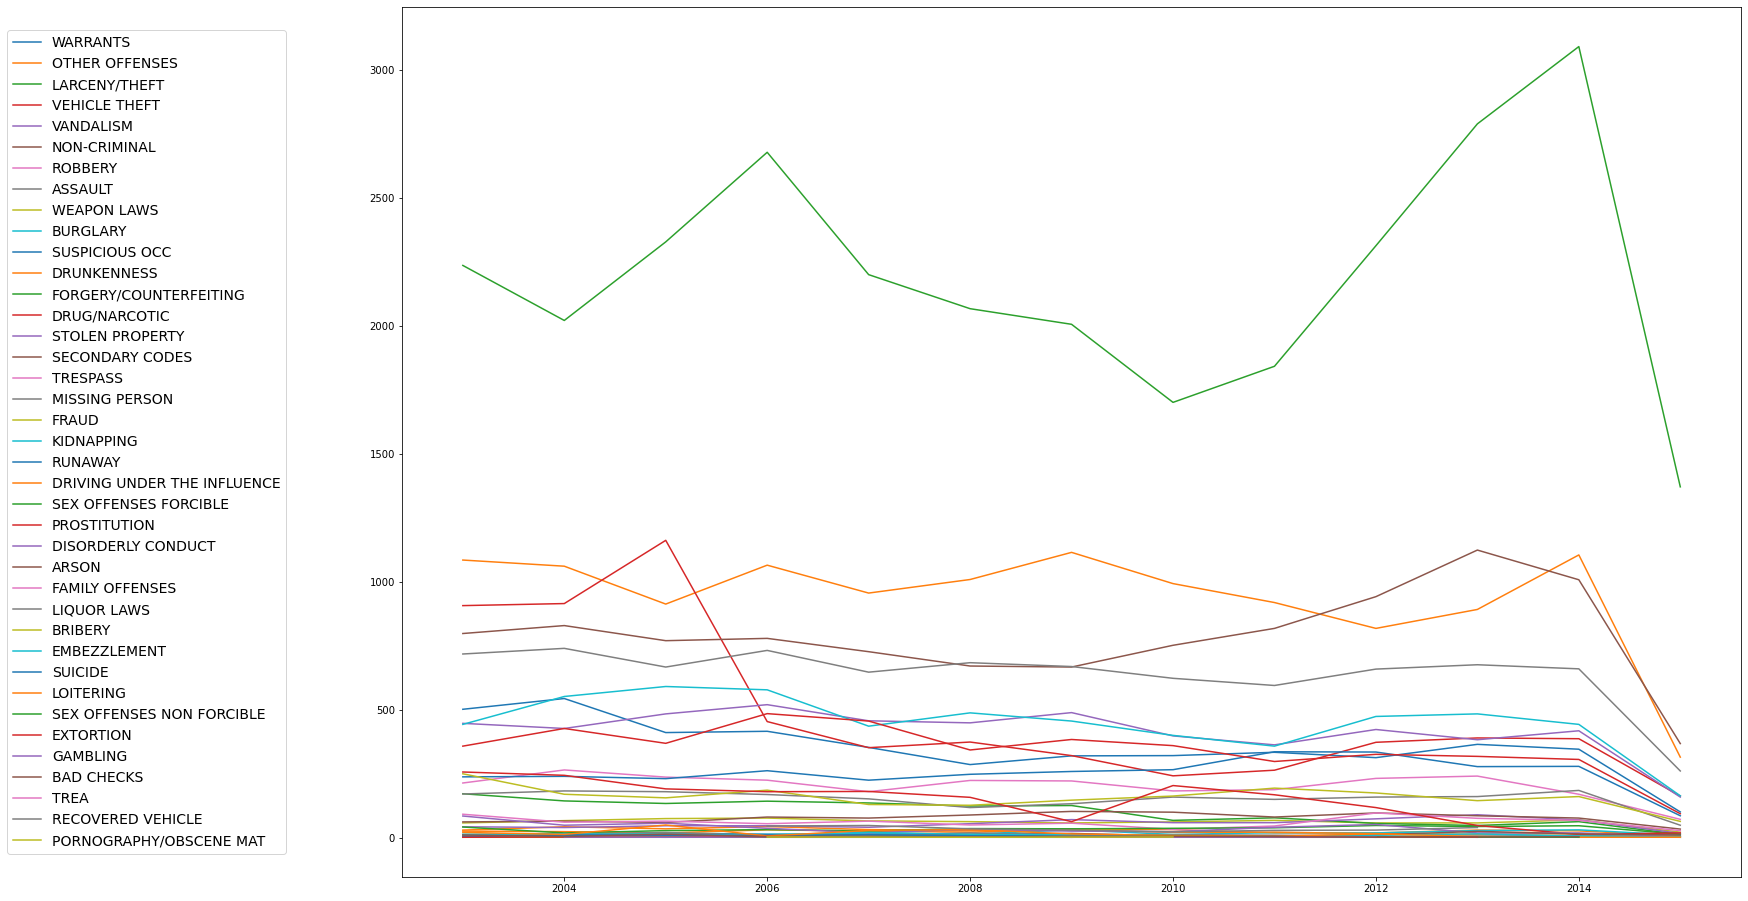

In [87]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('NORTHERN')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\974624126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\974624126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


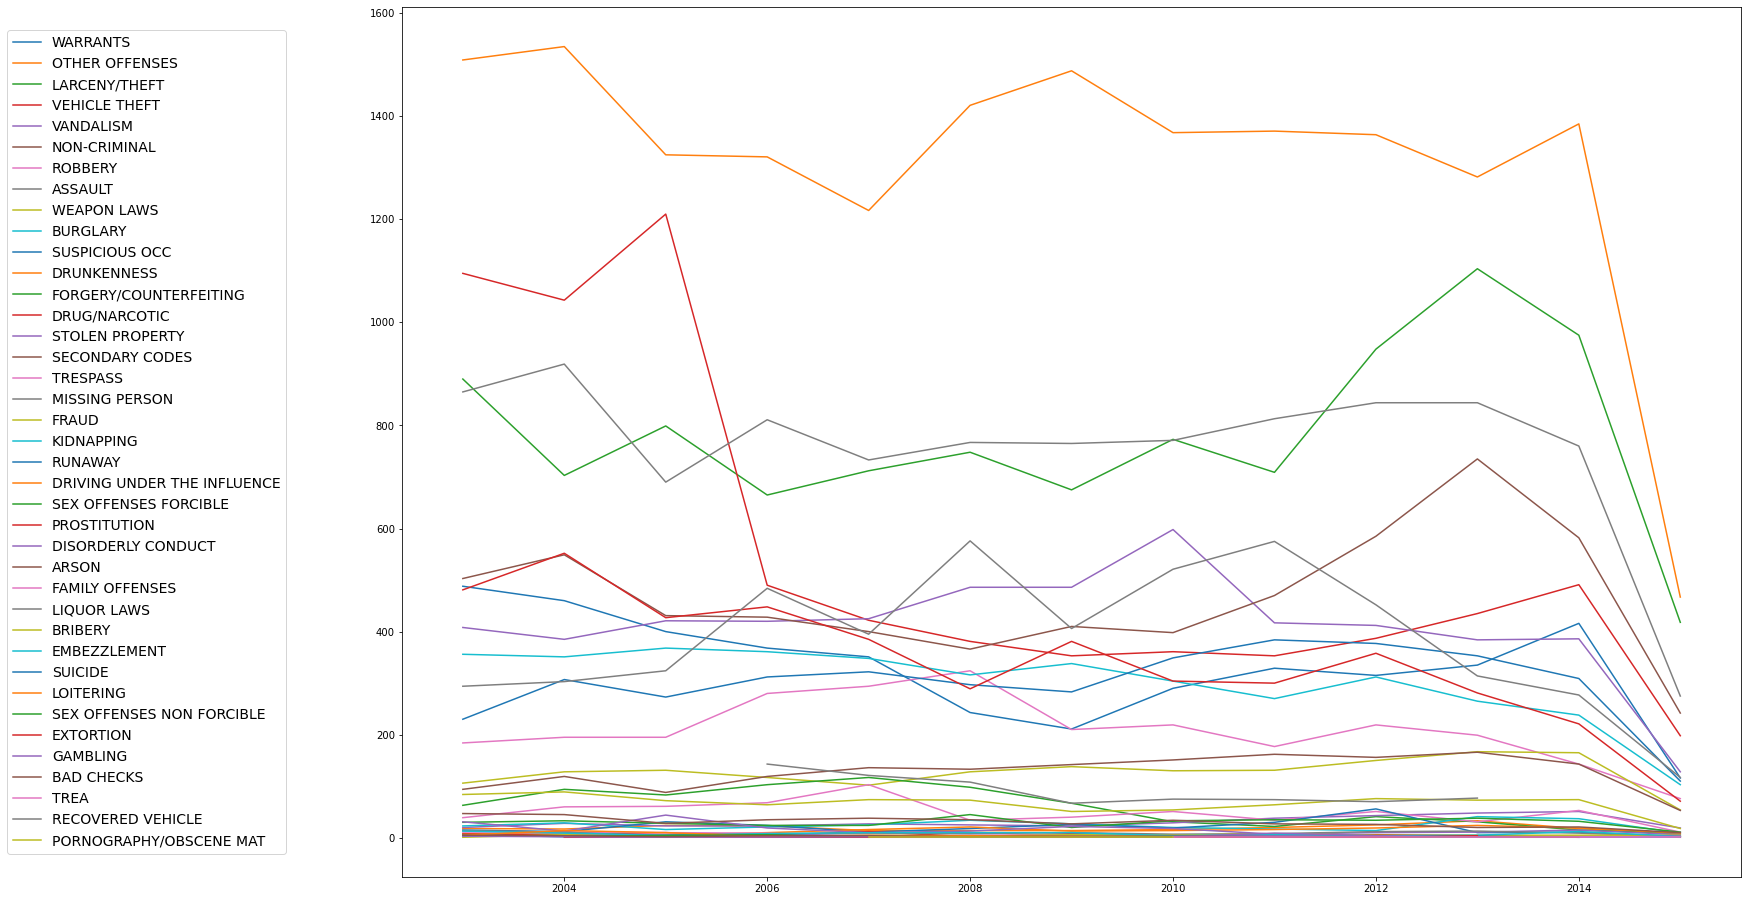

In [88]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('BAYVIEW')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\1851391320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\1851391320.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


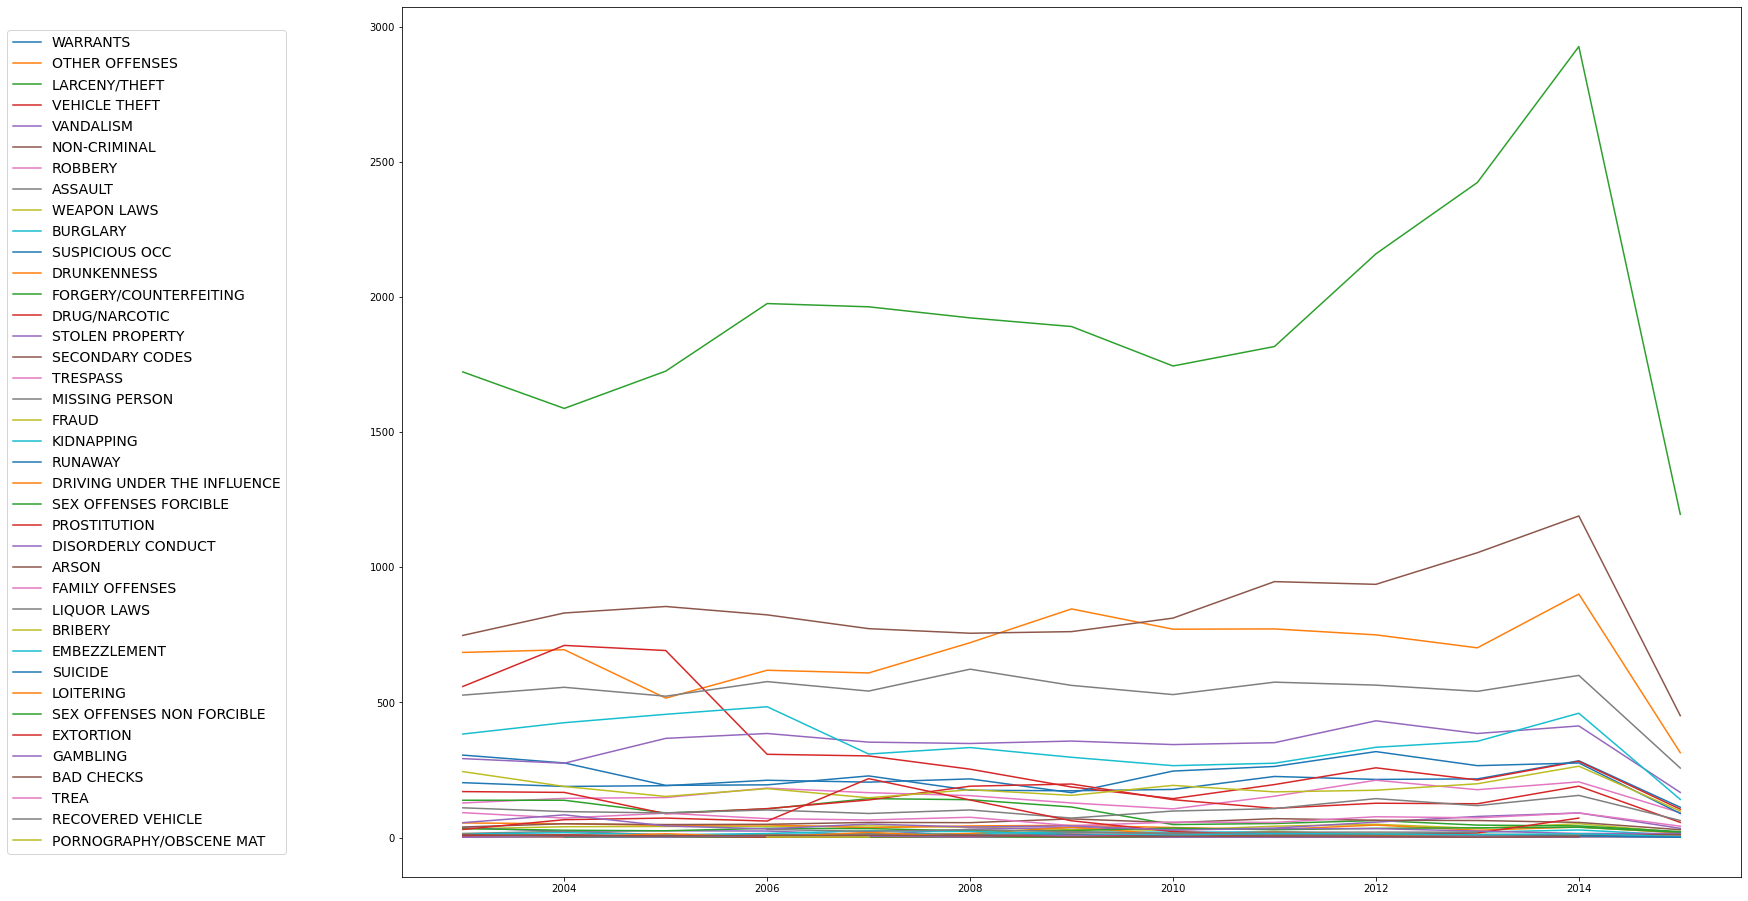

In [89]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('CENTRAL')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\3644356475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\3644356475.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


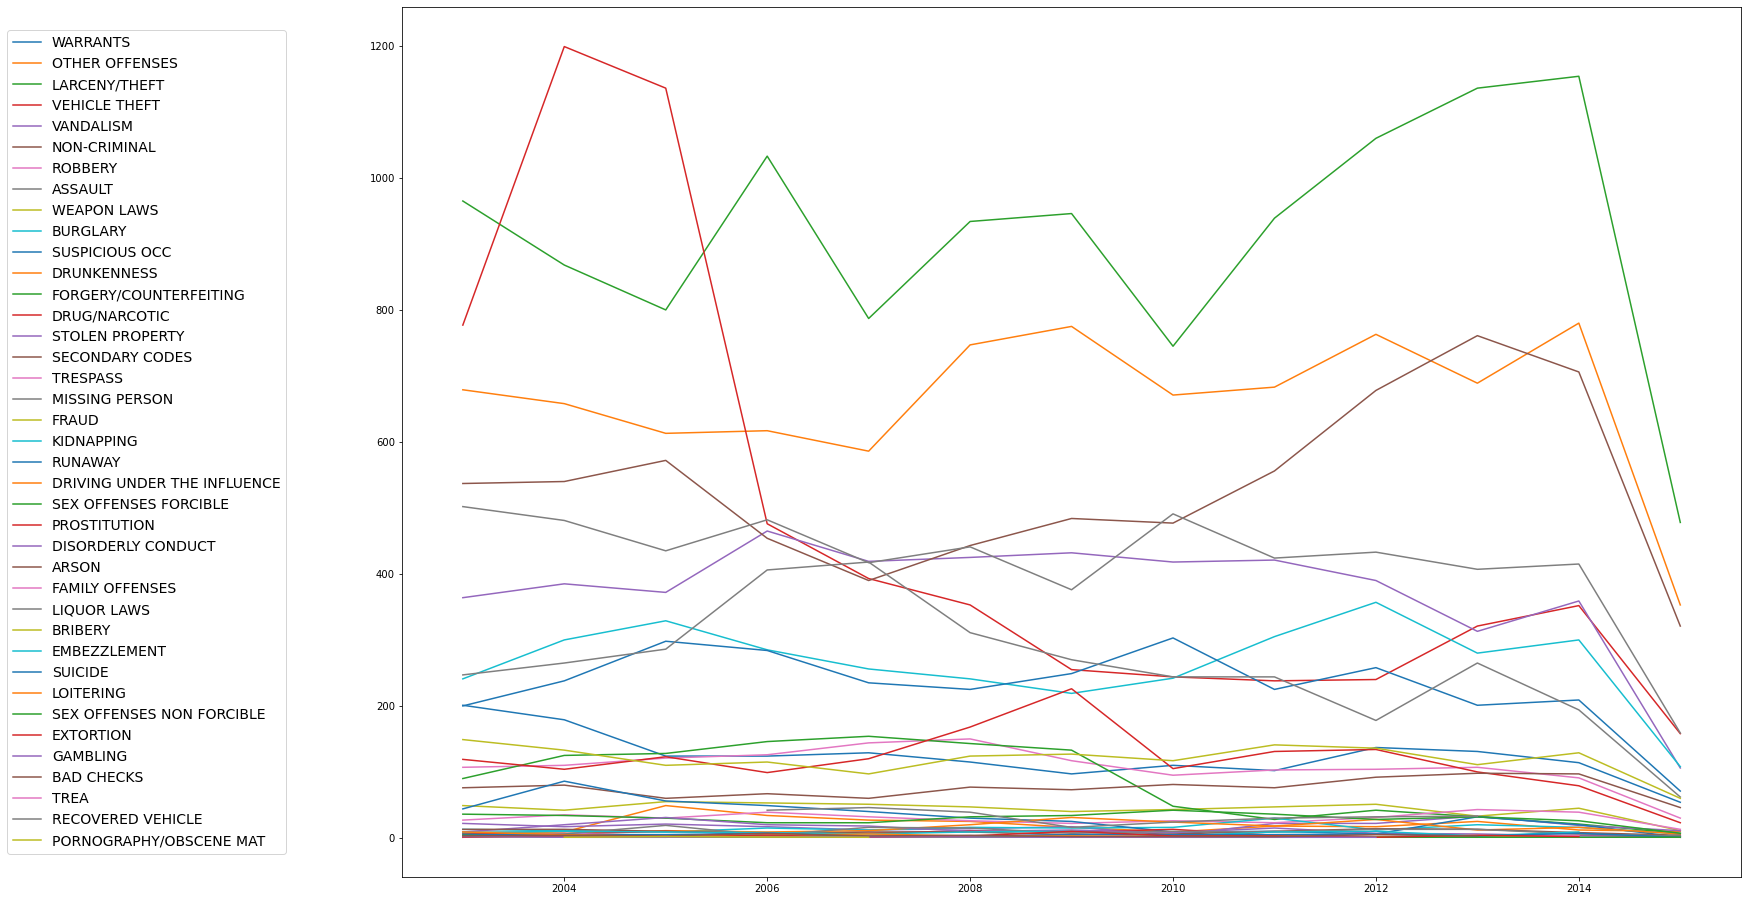

In [91]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('TARAVAL')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

C:\Users\raven\AppData\Local\Temp\ipykernel_26084\4111200231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['Date'].astype('datetime64')
C:\Users\raven\AppData\Local\Temp\ipykernel_26084\4111200231.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['datetime'].dt.year


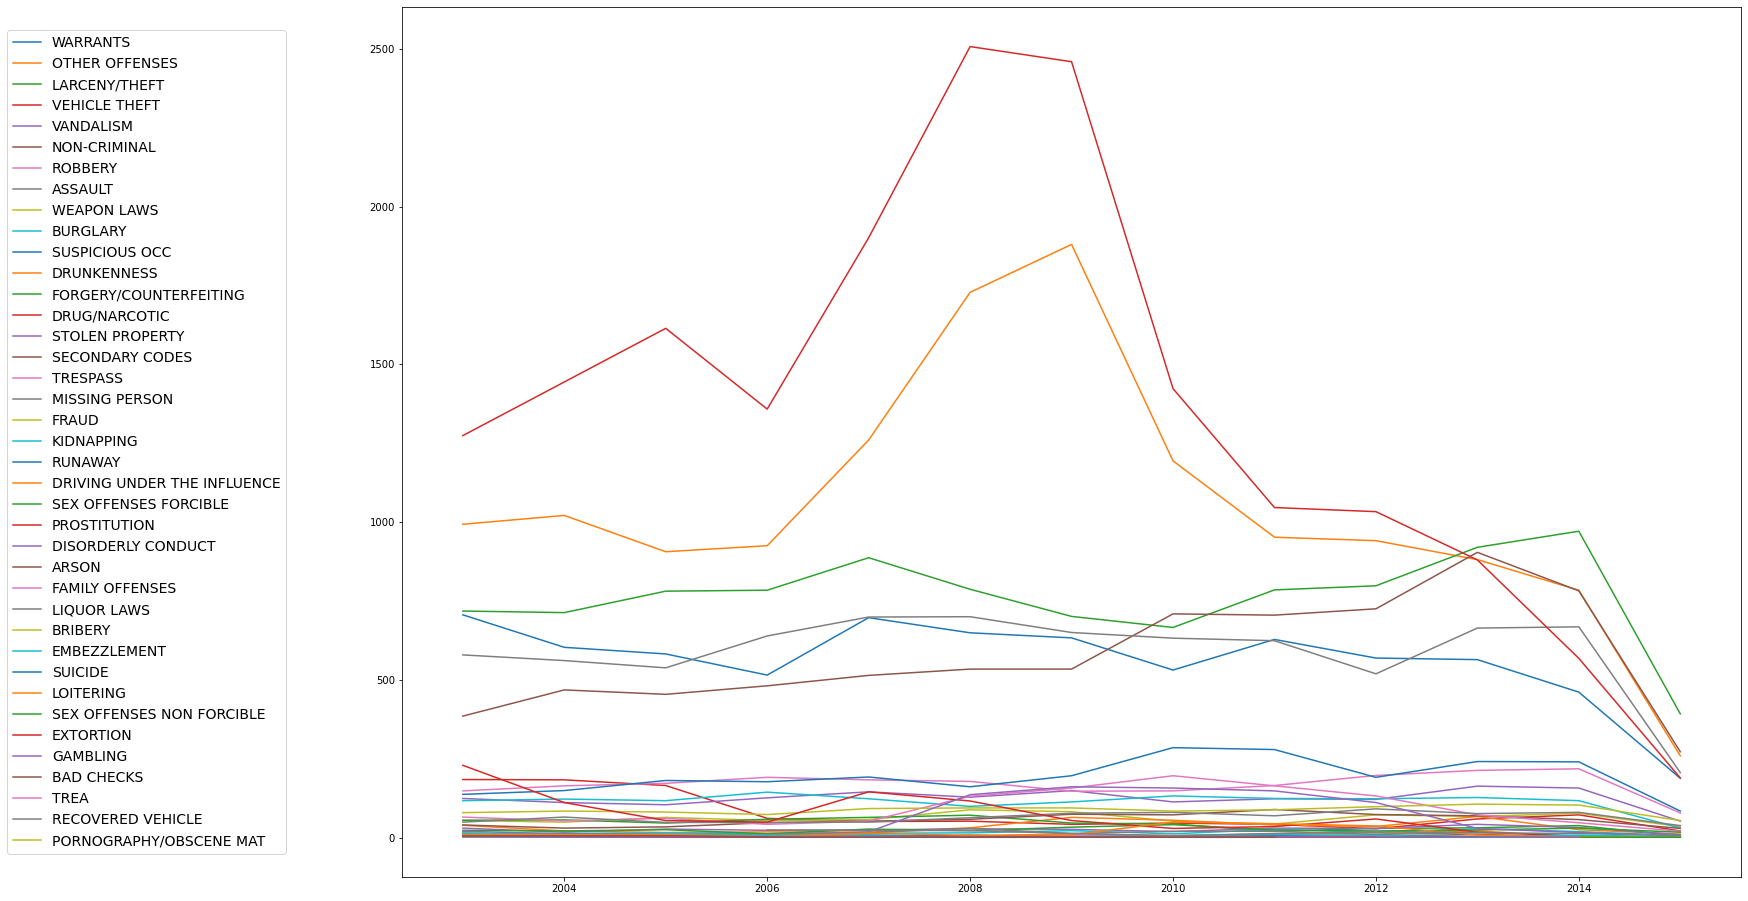

In [92]:
def show_incidents_count_by_year_graph(df):
    fig, ax = plt.subplots(1, 1, figsize=(24,16))

    
    data = df[df['PdDistrict'].str.contains('TENDERLOIN')]
    data['datetime'] = data['Date'].astype('datetime64')
    data['Year'] = data['datetime'].dt.year    

    for cat in df.Category.unique():
        curdata = data[data['Category'] == cat]
        counts = curdata.groupby('Year')
        a = counts.size()    
        x = list(a.index)
        y = list(a)    
        ax.plot(x, y, label=cat)

    plt.legend(prop={'size': 14}, loc='center left', bbox_to_anchor=(-0.3, 0.5))
    plt.show()
    
show_incidents_count_by_year_graph(train)

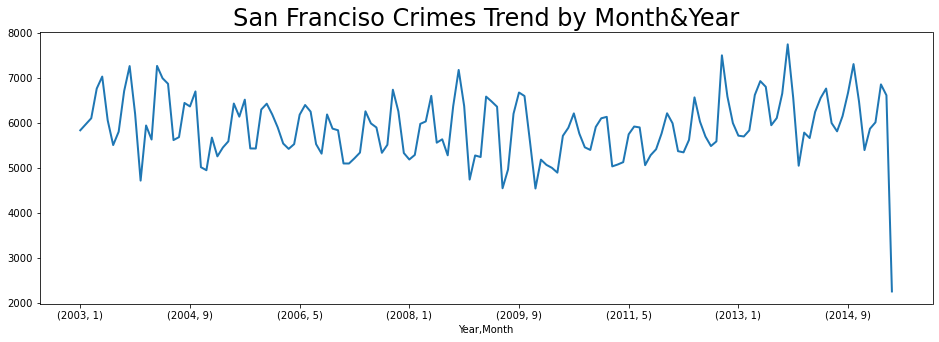

In [71]:
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = train.groupby(['Year','Month']).size()
ax = yearMonth.plot(lw=2)
plt.title('San Franciso Crimes Trend by Month&Year', fontsize=24)
plt.show()